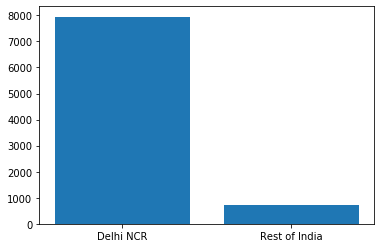

In [63]:
## ANSWER 1 TO THE PROJECT API2 [WORKING WITH THE ZOMATO'S DATA]

## Open and read data file as specified in the question
## Print the required output in given format
import csv
import matplotlib.pyplot as plt

path = 'C:\\Users\\Sankalp Arora\\Downloads\\zomato.csv'

delhi_ncr = ['New Delhi','Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad']
count_ncr = 0

with open(path, 'r',encoding= 'latin-1') as csvfile:
    reader = csv.DictReader(csvfile, skipinitialspace = True)

    count = 0
    for row in reader:
        #print(row)
        if row['Country Code'] == '1':
            count+=1
            if row['City'] in delhi_ncr:
                count_ncr += 1
                
count_rest_of_india = count - count_ncr 
x = ['Delhi NCR','Rest of India']
y = [count_ncr,count_rest_of_india]
plt.bar(x,y)
plt.show()

In [101]:
## ANSWER 2 TO THE PROJECT API2 [WORKING WITH THE ZOMATO'S DATA]

## Open and read data file as specified in the question
## Print the required output in given format
import csv
import matplotlib.pyplot as plt

path = 'C:\\Users\\Sankalp Arora\\Downloads\\zomato.csv'

delhi_ncr = ['New Delhi','Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad']
delhi_cuisines = set()
other_indian_cuisines = set()

with open(path, 'r',encoding= 'latin-1') as csvfile:
    reader = csv.DictReader(csvfile, skipinitialspace = True)

    for row in reader:
        #print(row)
        if row['Country Code'] == '1':
            if row['City'] in delhi_ncr:
                static = row['Cuisines'].split(',')
                #print(static)
                for i in static:
                    delhi_cuisines.add(i.replace(" ", ""))
            else:
                static1 = row['Cuisines'].split(',')
                #print(static)
                for i in static1:
                    other_indian_cuisines.add(i.replace(" ", ""))

final = other_indian_cuisines.symmetric_difference(delhi_cuisines) #subracted the common cuisines of delhi and india from the all india set to get the reqiured result

print(final)


import requests
token = '8a94b17ad5d8a7ca5b746d76cfa30c88'
basic_api = 'https://developers.zomato.com/api/v2.1'   #requesting access to the zomato api using the zomato token
params = {'city_id' :1} # city id if the delhi ncr is 1
headers = {'user-key' : token}
response = requests.get(basic_api + '/cuisines', headers = headers, params = params)
cuisines = response.json().get('cuisines')
d= set()
for i in cuisines:
    d.add(i['cuisine']['cuisine_name']) #getting all the cuisines of the delhi ncr 

#print(d)

print(final.issubset(d)) #checking if the cuisines are actually served or not 

#cuz the last print results if False 
# therefore the unserved cuisines are not the subset of the cuisines served in delhi thus they are not served actually
# hence proved by using the zomato api 



{'German', 'Malwani', 'Moroccan', 'Iranian', 'SouthAmerican', 'Persian', 'Oriya', 'Nepalese', 'CuisineVaries', 'Kashmiri', 'Assamese', 'Turkish', 'DrinksOnly', 'Naga', 'Cajun', 'Deli', 'Sushi', 'BBQ', 'Afghani', 'Pakistani', 'Bihari', 'RawMeats', 'SriLankan', 'Belgian'}
False


In [126]:
## ANSWER 3 TO THE PROJECT API2 [WORKING WITH THE ZOMATO'S DATA]

## Open and read data file as specified in the question
## Print the required output in given format


import csv
import matplotlib.pyplot as plt

path = 'C:\\Users\\Sankalp Arora\\Downloads\\zomato.csv'

delhi_ncr = ['New Delhi','Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad']
delhi_cuisines = set()
other_indian_cuisines = set()

with open(path, 'r',encoding= 'latin-1') as csvfile:
    reader = csv.DictReader(csvfile, skipinitialspace = True)
    
    delhi_cuisine_count = {} #dictionary to store the restaurant count in delhi 
    india_cuisine_count = {} #dictionary to store the restaurant count in india
    for row in reader:
        if row['Country Code'] == '1':
            if row['City'] in delhi_ncr:   #getting cuisines in delhi 
                static = row['Cuisines'].split(',')
                for i in static:
                    cuisine = i.replace(" ", "")
                    if cuisine in delhi_cuisine_count:
                        delhi_cuisine_count[cuisine]+=1
                    else :
                        delhi_cuisine_count[cuisine]=0
                        
                        
            else:
                static1 = row['Cuisines'].split(',') # getting cuisines in india 
                #print(static)
                for i in static1:
                    cuisine1 = i.replace(" ", "")
                    if cuisine1 in india_cuisine_count:
                        india_cuisine_count[cuisine1]+=1
                    else :
                        india_cuisine_count[cuisine1]=0
                        
from collections import OrderedDict # sorting the dictionary delhi_cuisine_count by values in descending order 
d_sorted_by_value = OrderedDict(sorted(delhi_cuisine_count.items(), key=lambda x: x[1],reverse=True))


from collections import OrderedDict # # sorting the dictionary india_cuisine_count by values in descending order 
d_sorted_by_value1 = OrderedDict(sorted(india_cuisine_count.items(), key=lambda x: x[1],reverse=True))


count = 0  # printing the top 10 from delhi cuisines
for i in d_sorted_by_value:
    print(i)
    if count == 9 :
        break
    count+=1

print('------------------------')

count = 0  # printing the top from indian cuisines
for i in d_sorted_by_value1:
    print(i)
    if count == 9 :
        break
    count+=1
    


    

NorthIndian
Chinese
FastFood
Mughlai
Bakery
SouthIndian
Continental
Desserts
StreetFood
Italian
------------------------
NorthIndian
Chinese
Continental
Italian
Cafe
FastFood
SouthIndian
Mughlai
Desserts
Mexican


In [ ]:
#
cuisine serve